In [2]:
#uncomment the following when using Colab or Kaggle
# !git clone https://github.com/MathiasKraus/neural_network_course_WS2425
# !pip install lightning

# when using Colab or Kaggle, also change 
# from data import ...
# to 
# from neural_network_course_WS2425.data import ...
# The same needs to be done for model and helper

In [3]:
import torch
import torch.nn.functional as F
from lightning.pytorch import Trainer
from lightning.pytorch.loggers import CSVLogger

from data import CatDogDataModule, MNISTDataModule
from model import VisionClassifier

from helper import show_image, get_sample, show_worst_image_predictions, show_confusion_matrix

torch.set_float32_matmul_precision('medium')

csv_logger = CSVLogger(save_dir='.', name='experiments')

In [4]:
# Step 1: We need to download an annotated dataset including images and classes and build a data module
data_module = CatDogDataModule()
#data_module = MNISTDataModule()

# Step 2: We use a pretrained vision model from torchvision
model = VisionClassifier(
    backbone="resnet18",
    num_classes=2,
)

# Step 3: Train Model
trainer = Trainer(max_epochs=1, logger=csv_logger)
trainer.fit(model, data_module)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name              | Type              | Params | Mode 
----------------------------------------------------------------
0 | feature_extractor | Sequential        | 11.2 M | train
1 | fc                | Sequential        | 139 K  | train
2 | loss_func         | BCEWithLogitsLoss | 0      | train
3 | train_acc         | BinaryAccuracy    | 0      | train
4 | val_acc           | BinaryAccuracy    | 0      | train
----------------------------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.264    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.


In [5]:
trainer.validate(model, data_module.val_dataloader())

Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val_acc_epoch       │    0.9800000190734863     │
│         val_loss          │    0.0761745274066925     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 0.0761745274066925, 'val_acc_epoch': 0.9800000190734863}]

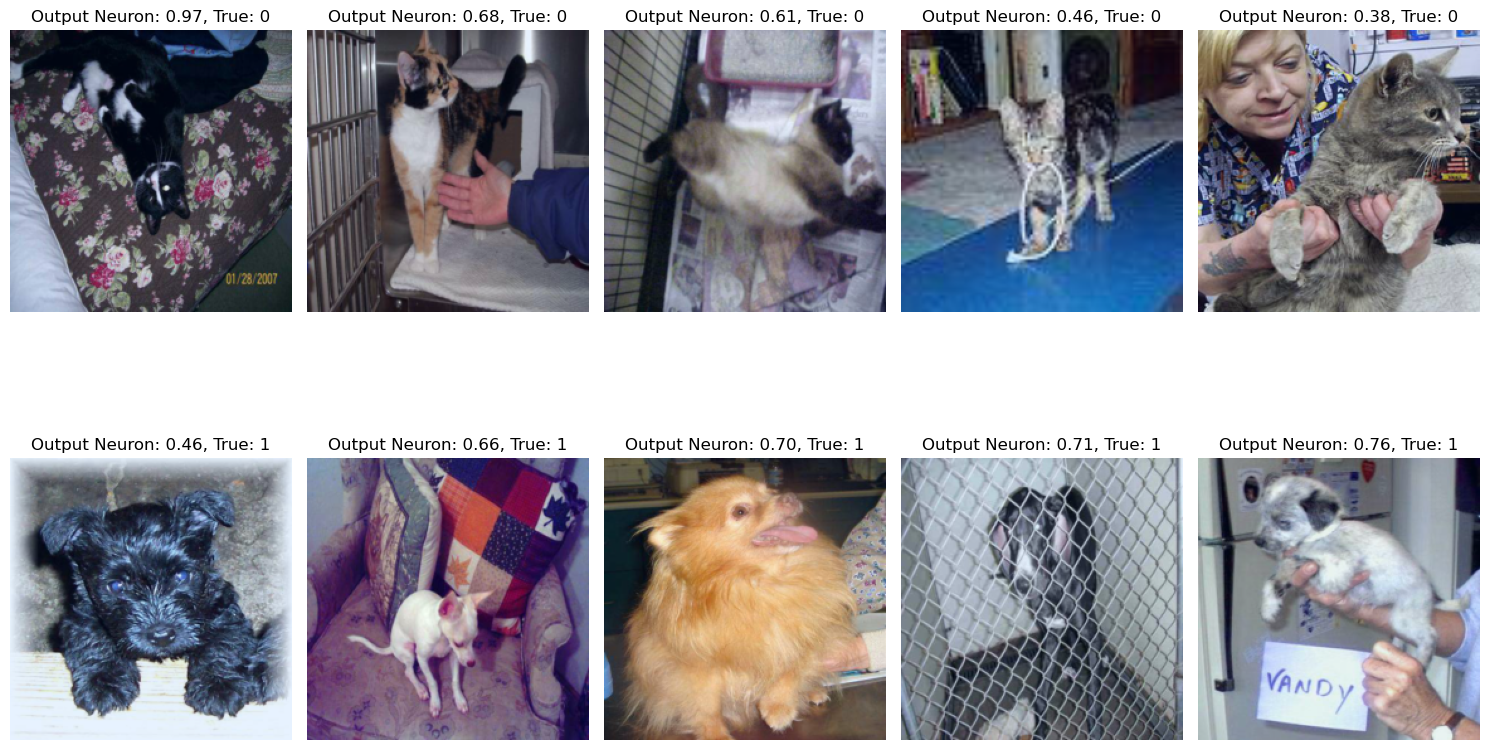

In [8]:
show_worst_image_predictions(model, data_module.val_dataloade()), n=5)

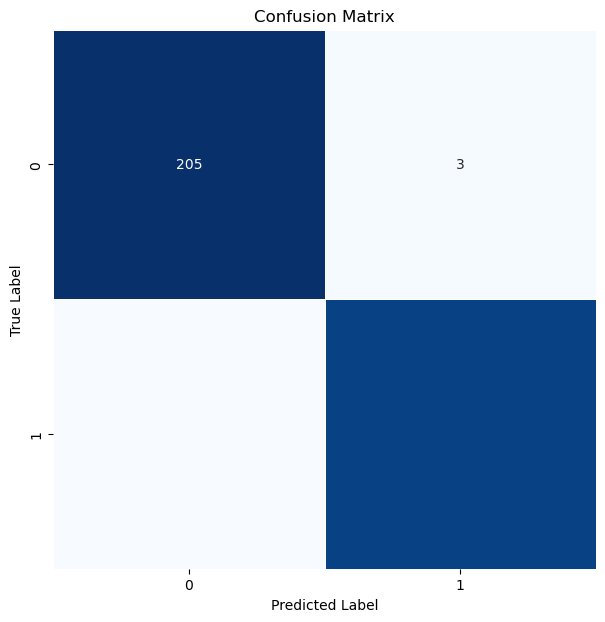

In [11]:
show_confusion_matrix(model, data_module.val_dataloader())

dog


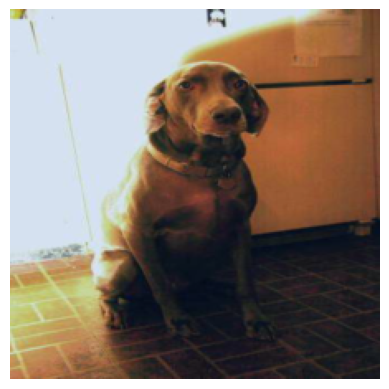

In [12]:
# Step 4: Make predictions with Model
x,y = get_sample(data_module)
pred = model.predict(x.unsqueeze(0))
print(data_module.class_names[pred])
show_image(x)